# Creating thickness maps from GeoTOP

In this example we will retrieve GeoTOP from the OpenDAP server for an area around Delft and 
visualize the thickness of several geological layers and lithologies to gain
a quick insight in how the subsurface in this area is built-up.

First, we import the GeoTop class from GeoST and retrieve GeoTOP data within the selected
bounding box.

In [1]:
from geost.bro import GeoTop

geotop_delft = GeoTop.from_opendap(bbox=(80000, 442000, 89000, 450000))

print(geotop_delft)

GeoTop
Data variables:
    strat    (y, x, z) float32 9MB dask.array<chunksize=(82, 92, 76), meta=np.ndarray>
    lithok   (y, x, z) float32 9MB dask.array<chunksize=(82, 92, 76), meta=np.ndarray>
    kans_1   (y, x, z) float32 9MB dask.array<chunksize=(82, 92, 76), meta=np.ndarray>
    kans_2   (y, x, z) float32 9MB dask.array<chunksize=(82, 92, 76), meta=np.ndarray>
    kans_3   (y, x, z) float32 9MB dask.array<chunksize=(82, 92, 76), meta=np.ndarray>
    kans_4   (y, x, z) float32 9MB dask.array<chunksize=(82, 92, 76), meta=np.ndarray>
    kans_5   (y, x, z) float32 9MB dask.array<chunksize=(82, 92, 76), meta=np.ndarray>
    kans_6   (y, x, z) float32 9MB dask.array<chunksize=(82, 92, 76), meta=np.ndarray>
    kans_7   (y, x, z) float32 9MB dask.array<chunksize=(82, 92, 76), meta=np.ndarray>
    kans_8   (y, x, z) float32 9MB dask.array<chunksize=(82, 92, 76), meta=np.ndarray>
    kans_9   (y, x, z) float32 9MB dask.array<chunksize=(82, 92, 76), meta=np.ndarray>
    onz_lk   (y, x, 

As you can see, geotop_delft is now an instance of [`GeoTop`](../api_reference/bro_geotop.rst) 
and provides a number of methods to make further selections and exports. 
We will make use of the GeoTop.get_thickness method.

We'd like to know the total thickness of clay layers in the area. Let's first check the
GeoTop lithology encoding, which can be accessed from the [`Lithology`](../api_reference/geotop_selection.rst)
class or through downloading the reference list from the [GeoTOP page on the BRO website](https://basisregistratieondergrond.nl/inhoud-bro/registratieobjecten/modellen/geotop-gtm/).
The code for 'Clay' in GeoTOP is 2, so we will use that in the get_thickness method as follows:

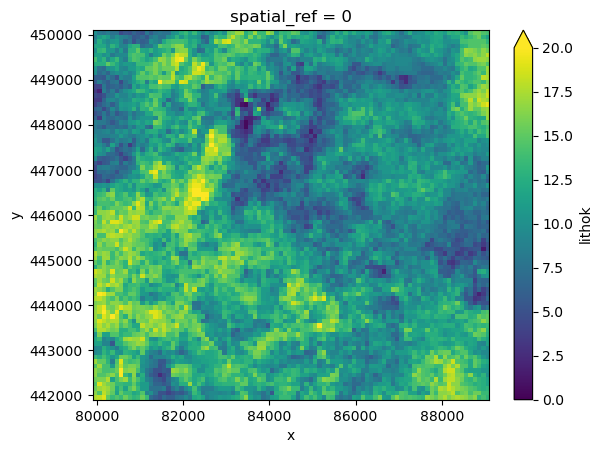

In [2]:
thickness_clay = geotop_delft.get_thickness(geotop_delft["lithok"] == 2)
thickness_clay.plot.imshow(vmin=0, vmax=20)

This shows the total thickness of all clay layers combined in the GeoTOP model. However,
we are only interested in Holocene clay layers. The Holocene stratigraphic units are encoded
between 0 and 2030, so we can add this as a condition:

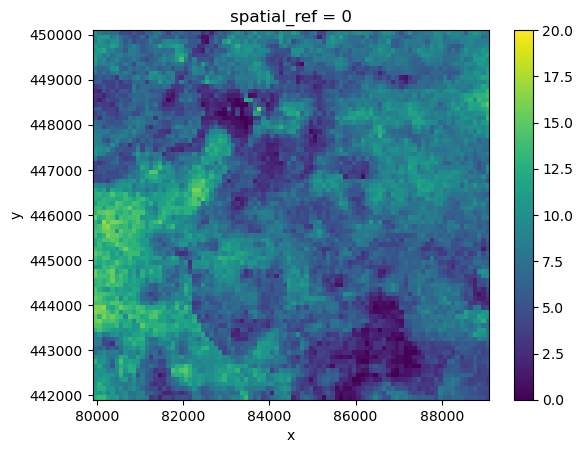

In [ ]:
# Get the total thickness of clay in the Holocene stratigraphic units (<= 2030)
thickness_clay_holocene = geotop_delft.get_thickness((geotop_delft["lithok"] == 2) & (geotop_delft["strat"] <= 2030))
thickness_clay_holocene.plot.imshow(vmin=0, vmax=20)

We can also get the thickness of, say, basal peat. The code for organic material is 1 and
the stratigraphic unit we're looking for is the Formatie van Nieuwkoop - Basisveen Laag, 
which is encoded as 1130.

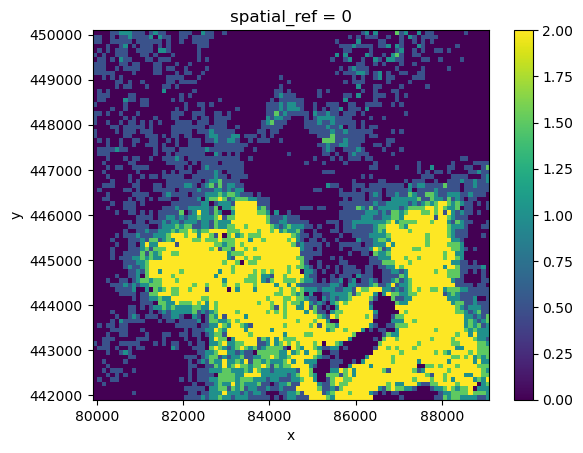

In [10]:
# Get the thickness of basal peat
thickness_basal_peat = geotop_delft.get_thickness((geotop_delft["lithok"] == 1) & (geotop_delft["strat"] == 1130))
thickness_basal_peat.plot.imshow()

Since the results are Xarray DataArrays, we can export them using rioxarray to geotiffs
for sharing and viewing the results in GIS software for example.

In [ ]:
# Export thickness_basal_peat to a GeoTIFF using rioxarray
thickness_basal_peat.rio.to_raster("thickness_basal_peat.tif")